In [1]:
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import time
import tensorflow as tf
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# Carregar o conjunto de dados
df = pd.read_csv('fer2013.csv')  # Substitua pelo caminho do seu conjunto de dados
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
# Pré-processamento do conjunto de dados
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0) / 255.0

labels = df.emotion.values

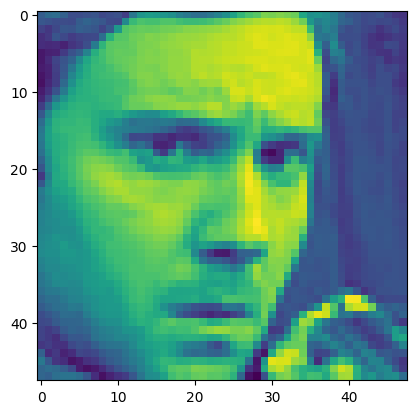

In [4]:
pyplot.imshow(np.array(df.pixels.loc[0].split(' ')).reshape(48, 48).astype('float32'))

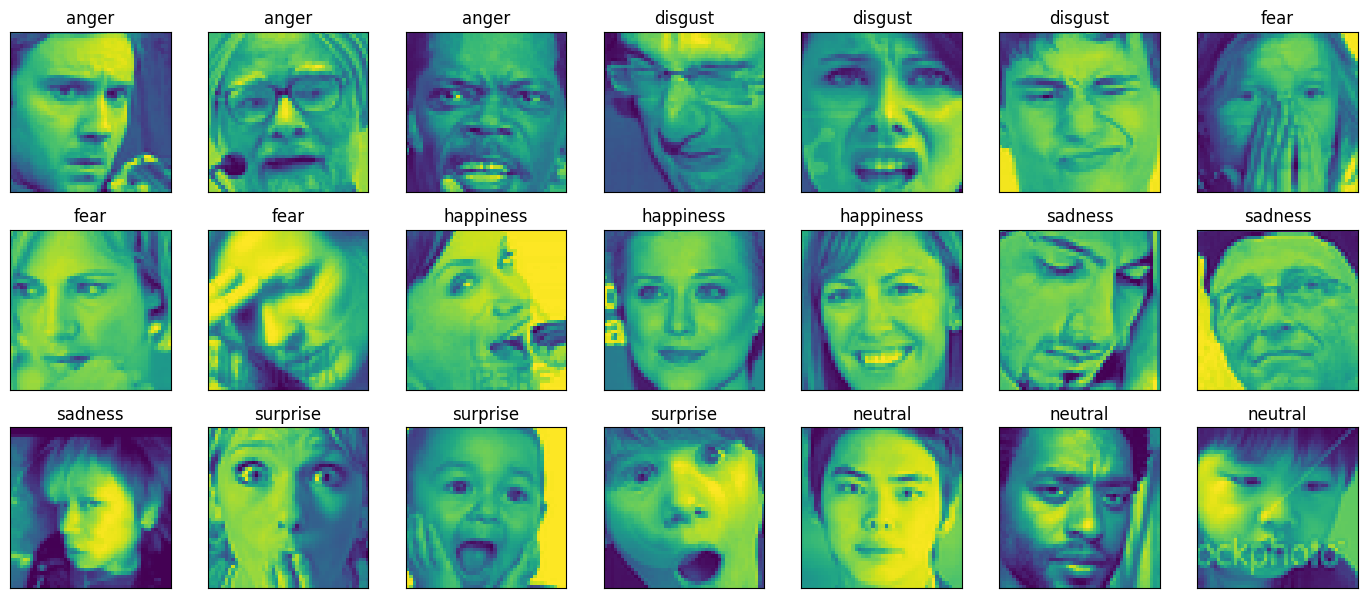

In [5]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4:'sadness', 5:'surprise', 6:'neutral'}

fig = pyplot.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
  for j in range(3):
    px = df[df.emotion==label].pixels.iloc[k]
    px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
    k += 1
    ax = pyplot.subplot(7, 7, k)
    ax.imshow(px)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label_to_text[label])
    pyplot.tight_layout()

In [6]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.2, random_state=42)

X_train = X_train /255
X_test = X_test /255

print("Conjunto de treinamento (X_train):")
print(X_train)

print("\nConjunto de teste (X_test):")
print(X_test)

print("\nLabels do conjunto de treinamento (y_train):")
print(y_train)

print("\nLabels do conjunto de teste (y_test):")
print(y_test)

Conjunto de treinamento (X_train):
[[[[6.1514809e-05]
   [6.1514809e-05]
   [6.1514809e-05]
   ...
   [4.4598232e-04]
   [4.9211847e-04]
   [4.7673972e-04]]

  [[1.5378701e-04]
   [1.3840832e-04]
   [9.2272203e-05]
   ...
   [1.9069589e-03]
   [2.0761248e-03]
   [2.0761248e-03]]

  [[1.3840832e-04]
   [1.3840832e-04]
   [1.0765091e-04]
   ...
   [1.8300654e-03]
   [1.9684739e-03]
   [2.0146100e-03]]

  ...

  [[1.7993080e-03]
   [1.8300654e-03]
   [1.9530950e-03]
   ...
   [1.0765091e-04]
   [6.1514809e-05]
   [6.1514809e-05]]

  [[2.3068051e-04]
   [1.8454441e-04]
   [3.2295272e-04]
   ...
   [4.6136101e-05]
   [3.0757405e-05]
   [4.6136101e-05]]

  [[1.5378702e-05]
   [1.5378702e-05]
   [0.0000000e+00]
   ...
   [4.6136101e-05]
   [4.6136101e-05]
   [4.6136101e-05]]]


 [[[4.6136102e-04]
   [4.9211847e-04]
   [6.3052675e-04]
   ...
   [2.7989235e-03]
   [2.4913496e-03]
   [2.3990774e-03]]

  [[3.6908881e-04]
   [5.6901196e-04]
   [4.7673972e-04]
   ...
   [2.7835448e-03]
   [2.460592

In [11]:
# Definindo o modelo CNN
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.BatchNormalization(input_shape = (48,48,1)))
model_cnn.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model_cnn.add(tf.keras.layers.Dropout(0.2))

model_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model_cnn.add(tf.keras.layers.Dropout(0.1))

#model_cnn.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
#model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#model_cnn.add(tf.keras.layers.Dropout(0.5))

model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(64, activation='relu')) #testar com sigmoid
model_cnn.add(tf.keras.layers.Dropout(0.1))
model_cnn.add(tf.keras.layers.Dense(7))
model_cnn.add(tf.keras.layers.Activation('softmax'))

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 48, 48, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       6656      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 47, 47, 256)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 47, 47, 256)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 128)       295040    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 46, 46, 128)      

In [15]:
# Compilando o modelo
model_cnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = .001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  )

In [14]:
# Configurando o callback para salvar o melhor modelo durante o treinamento
checkpoint_path = 'checkpointCNN/best_model_cnn.h5'
call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                               # Parâmetro monitor: qual métrica será monitorada
                                                monitor='val_accuracy',
                                                # Verbose: controla a quantidade de informações impressas durante o treinamento
                                                verbose=1,
                                                # Salva o modelo a cada época
                                                save_freq='epoch',
                                                # Parâmetro save_best_only: se True, o modelo é salvo quando a métrica monitorada é maximizada
                                                save_best_only=True,
                                                # determina se apenas os pesos do modelo devem ser salvos ou o modelo completo, FALSE significa completo
                                                save_weights_only=False,
                                                # Parâmetro mode: indica se a métrica monitorada deve ser maximizada ou minimizada
                                                mode='max')

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

# Defina o callback de parada antecipada
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treine o modelo com parada antecipada
history = model_cnn.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
718/718 [==============================] - 3778s 5s/step - loss: 1.7359 - accuracy: 0.2934 - val_loss: 1.6297 - val_accuracy: 0.3750
Epoch 2/30
718/718 [==============================] - 1749s 2s/step - loss: 1.5898 - accuracy: 0.3800 - val_loss: 1.5201 - val_accuracy: 0.4228
Epoch 3/30
621/718 [========================>.....] - ETA: 3:43 - loss: 1.5019 - accuracy: 0.4174

In [ ]:
# Avaliação do modelo no conjunto de teste
_, test_accuracy = model_cnn.evaluate(X_test, y_test)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

225/225 [==============================] - 25s 101ms/step - loss: 1.9343 - accuracy: 0.5308
Acurácia no conjunto de teste: 53.08%


In [ ]:
# Carregar o modelo treinado
final_model_mlp = load_model(checkpoint_path)

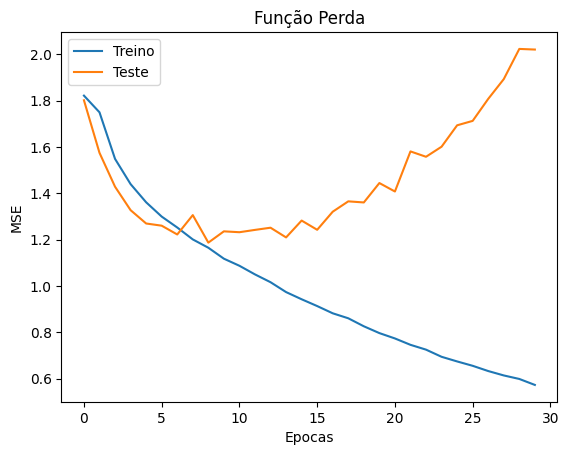

In [ ]:
# Plot training & validation accuracy values
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Função Perda')
pyplot.ylabel('MSE')
pyplot.xlabel('Epocas')
pyplot.legend(['Treino', 'Teste'], loc='upper left')
pyplot.show()

In [ ]:
output_model_ = final_model_mlp.predict(X_test)

225/225 [==============================] - 25s 107ms/step


In [ ]:
#reshape output_model_ to same shape as y_test
output_model_ = np.argmax(output_model_, axis=1)

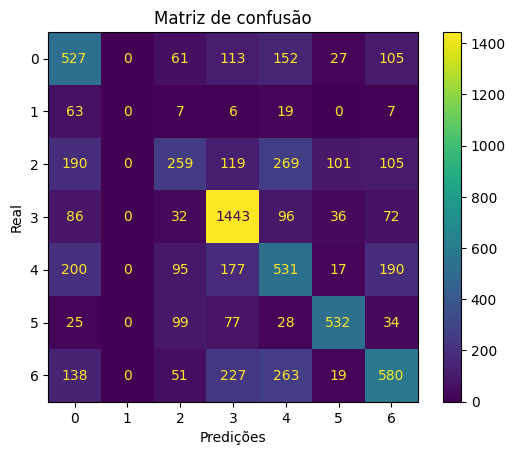

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, output_model_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Matriz de confusão')
disp.ax_.set_xlabel('Predições')
disp.ax_.set_ylabel('Real')
pyplot.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Acurácia: ', accuracy_score(y_test, output_model_))
print('Precisão: ', precision_score(y_test, output_model_, average='macro'))
print('Recall: ', recall_score(y_test, output_model_, average='macro'))
print('F1: ', f1_score(y_test, output_model_, average='macro'))

Acurácia:  0.5394260239621065
Precisão:  0.453355879331263
Recall:  0.4518243926697289
F1:  0.4464389066148225


c:\Users\samue\Desktop\nicolas\reconhecimento-facial-projeto-2\projeto\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
